In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-distress/Financial Distress.csv


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [74]:
data = pd.read_csv("/kaggle/input/financial-distress/Financial Distress.csv")

In [75]:
data = data[data.columns.drop(list(data.filter(regex='x80')))]

In [76]:
Y = data.iloc[:,2].values
for y in range(0,len(Y)): 
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = data.iloc[:,3:].values

In [77]:
num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)

Number of observations for BANKRUPT companies(1's): 136
Number of observations for HEALTHY companies(0's): 3536


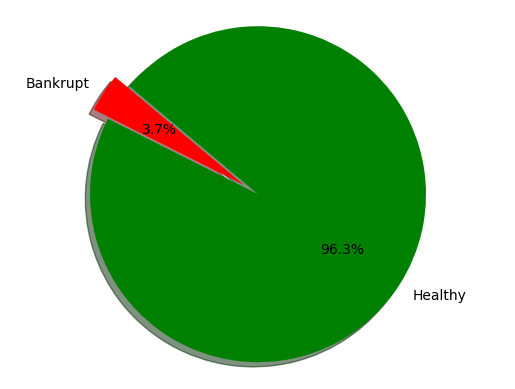

In [78]:

import matplotlib.pyplot as plt
labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
X_train = np.array(X)
y_train = np.array(Y)

In [81]:
y_train = (np.matrix(y_train)).T
y_train = pd.DataFrame(y_train)
y_train.columns = ["Financial_Distress"]
X_train = pd.DataFrame(X_train)
frame = [X_train,y_train]
train_data = pd.concat(frame,axis = 1)
bankrupt_companies = train_data[train_data.Financial_Distress == 1]

feat_mat = bankrupt_companies.iloc[:,:-1].values
response = bankrupt_companies.iloc[:,-1].values
col_mean = np.zeros(shape=(82,1))
col_std = np.zeros(shape=(82,1))
Dim_1 = np.shape(feat_mat)
for i in range(0,Dim_1[1]): 
       col_mean[i,0] = np.mean(feat_mat[:,i])
       col_std[i,0] = np.std(feat_mat[:,i])
col_mean_and_std = np.hstack((col_mean,col_std))

added_data = np.zeros(shape=(3000,Dim_1[1]))
for i in range (0,len(col_mean_and_std)):
       mean_ = col_mean_and_std[i,0]
       std_ = col_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,3000)
added_y = np.ones(shape=(3000,1)) 

X_resampled = np.vstack((X_train,added_data)) 
y_train = np.array(y_train)
y_resampled = np.vstack((y_train,added_y))

Number of observations for BANKRUPT companies(1's): 3136
Number of observations for HEALTHY companies(0's): 3536


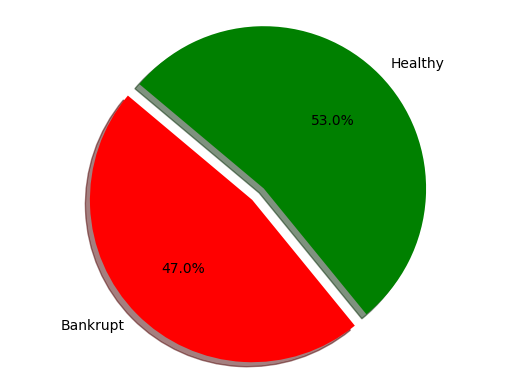

In [84]:

num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)


labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0] 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [85]:
''' Standardizing the range of features to have a mean of 0 and standard deviation of 1
allows for better performance and faster convergence during model training.'''
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf,cv=3, param_grid=param_grid, refit=True, verbose=3)

grid.fit(X,Y)

best_params = grid.best_params_

print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.983 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.981 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.982 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.978 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.994 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.979 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.993 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.981 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.994 total time=   6.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.983 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.993 total time=   1.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.980 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.993 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.981 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.982 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.990 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.979 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.984 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.987 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.992 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.992 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.992 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.983 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.985 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.985 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.991 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.987 total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.991 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.991 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.985 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.991 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.987 total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.939 total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.984 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.985 total time=   5.2s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.983 total time=   0.3s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s
[CV 1/3] END max_depth=None, max

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.992 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.994 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.984 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.994 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.987 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.983 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.994 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.983 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.993 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.984 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.994 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.986 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.981 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.993 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.993 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.985 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.985 total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.990 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.994 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.984 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.994 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.987 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.983 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.994 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.983 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.993 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.985 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.993 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.986 total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.992 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.993 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.984 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.986 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.991 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.984 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.992 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.987 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.991 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.986 total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.982 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.991 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.984 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.992 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.987 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.991 total time=   5.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.986 total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.981 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.983 total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.984 total time=   2.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.993 total time=   4.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.986 total time=   4.9s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.939 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.992 total time=   0.3s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.979 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.994 total time=   1.2s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.2s
[CV 1/3] END max_depth=10, max_features=sqrt, 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.982 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.978 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.994 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.979 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.994 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.982 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.994 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.983 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.980 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.993 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.982 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   5.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.982 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.990 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.979 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.984 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.987 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.992 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.992 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.992 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.984 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.983 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.986 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.985 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.991 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.987 total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.991 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.985 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.991 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.987 total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.984 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.985 total time=   5.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.982 total time=   0.3s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s
[CV 1/3] END max_depth=20, max_features=sqrt, 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.983 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.994 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.981 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.982 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.978 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.994 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.979 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.993 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.981 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.994 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.983 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.980 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.993 total time=   3.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.981 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.994 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.982 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.990 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.979 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.939 total time=   4.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.993 total time=   5.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.984 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.987 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.979 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.992 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.982 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.992 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.992 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.983 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.982 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.993 total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.985 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.991 total time=   1.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.991 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.985 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.991 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.987 total time=   5.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.988 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.980 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.991 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.985 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.939 total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.991 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.985 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.939 total time=   3.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.991 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.987 total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.989 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.982 total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.939 total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.991 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.982 total time=   1.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.939 total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.992 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.984 total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.992 total time=   5.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.985 total time=   5.3s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.940 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.991 total time=   0.3s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.983 total time=   0.3s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.939 total time=   1.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.993 total time=   1.4s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.982 total time=   1.4s
[CV 1/3] END max_depth=30, max_features=sqrt, 

In [91]:

classifier = RandomForestClassifier(**best_params)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = classifier.score(X_test, y_test)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9805194805194806


In [92]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Precision: 0.9923497267759562
Recall: 0.9659574468085106
F1 score: 0.9789757412398922
Accuracy: 0.9805194805194806


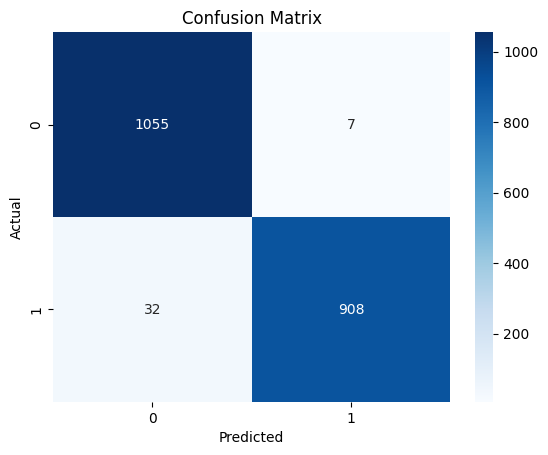

In [93]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()


In [94]:
!pip install pyswarms

In [95]:
import numpy as np
import pyswarms as ps
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Define bounds
max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)



def f_per_particle(m, X, y, alpha):
    
    total_features = X.shape[1]

    X_subset = X[:, m > 0.5]
    if X_subset.shape[1] == 0:
        return float('inf')

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

    clf = RandomForestClassifier(**best_params)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

def f(x, X, y, alpha=0.5):
    
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], X, y, alpha) for i in range(n_particles)]
    return np.array(j)

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=X.shape[1], options=options, bounds=bounds)

cost, pos = optimizer.optimize(f, iters=100, X=X, y=Y)


2024-05-11 01:25:36,647 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.125
2024-05-11 02:33:43,267 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.12459491727784411, best pos: [0.02604197 0.65697729 0.57245702 0.61474818 0.85140601 0.84846125
 0.51912261 0.65134278 0.59751229 0.33856249 0.73591954 0.69622394
 0.08741488 0.93555915 0.85801464 0.57745974 0.57842182 0.90905034
 0.69165655 0.67754107 0.11171898 0.88327882 0.53206697 0.76222314
 0.42617577 0.65995475 0.85046482 0.50982184 0.78208579 0.52496975
 0.81148941 0.69015903 0.51160486 0.74634522 0.69559432 0.36998802
 0.83439473 0.84818579 0.72146524 0.49229013 0.95207684 0.53276478
 0.42431938 0.61287554 0.18005222 0.64209112 0.75573438 0.65884897
 0.73267236 0.31666541 0.95433663 0.68807007 0.22729396 0.85370873
 0.71184363 0.65604121 0.77609318 0.34377928 0.71417725 0.54361149
 0.5356

In [96]:
best_pos = np.array(pos)

print("Position as NumPy Array:", best_pos)


Position as NumPy Array: [0.02604197 0.65697729 0.57245702 0.61474818 0.85140601 0.84846125
 0.51912261 0.65134278 0.59751229 0.33856249 0.73591954 0.69622394
 0.08741488 0.93555915 0.85801464 0.57745974 0.57842182 0.90905034
 0.69165655 0.67754107 0.11171898 0.88327882 0.53206697 0.76222314
 0.42617577 0.65995475 0.85046482 0.50982184 0.78208579 0.52496975
 0.81148941 0.69015903 0.51160486 0.74634522 0.69559432 0.36998802
 0.83439473 0.84818579 0.72146524 0.49229013 0.95207684 0.53276478
 0.42431938 0.61287554 0.18005222 0.64209112 0.75573438 0.65884897
 0.73267236 0.31666541 0.95433663 0.68807007 0.22729396 0.85370873
 0.71184363 0.65604121 0.77609318 0.34377928 0.71417725 0.54361149
 0.53568987 0.60707679 0.096032   0.75315842 0.67900134 0.39965496
 0.39379091 0.65340853 0.62713201 0.11529495 0.96813901 0.289438
 0.10867546 0.50538208 0.58130238 0.5513605  0.58731043 0.78962061
 0.44808236 0.58828408 0.74774855 0.87393729]


In [97]:
threshold = 0.6

selected_features_mask = best_pos > threshold

feature_names = data.iloc[:,2:].columns[:-1] 

selected_features = feature_names[selected_features_mask]

print("Selected Features:", selected_features)

Selected Features: Index(['x1', 'x3', 'x4', 'x5', 'x7', 'x10', 'x11', 'x13', 'x14', 'x17', 'x18',
       'x19', 'x21', 'x23', 'x25', 'x26', 'x28', 'x30', 'x31', 'x33', 'x34',
       'x36', 'x37', 'x38', 'x40', 'x43', 'x45', 'x46', 'x47', 'x48', 'x50',
       'x51', 'x53', 'x54', 'x55', 'x56', 'x58', 'x61', 'x63', 'x64', 'x67',
       'x68', 'x70', 'x77', 'x81', 'x82'],
      dtype='object')


In [98]:
selected=selected_features.values.tolist()

In [99]:
mask = np.isin(data.iloc[:,3:].columns,selected)
X_selected = X[:,mask]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)


Accuracy: 0.983016983016983
Precision: 0.9955257270693513
Recall: 0.967391304347826
F1 score: 0.9812568908489526
Accuracy: 0.983016983016983


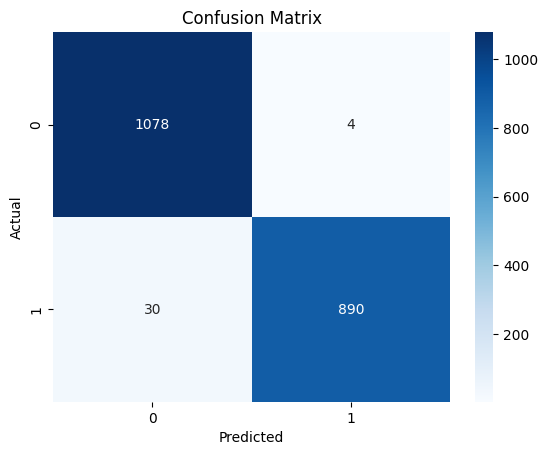

In [101]:


import matplotlib.pyplot as plt

classifier = RandomForestClassifier(**best_params)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = classifier.score(X_test, y_test)

print(f"Accuracy: {accuracy}")


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()
